![Verne](https://www.vernegroup.com/wp-content/uploads/2020/07/LOGO-VERNE-TECHNOLOGY-GROUP-3.png)


# Teoría sobre la infidelidad matrimonial
http://www.statsmodels.org/stable/datasets/generated/fair.html
  
https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf 

In [ ]:
!pip install statsmodels
!pip install scipy==1.2 --upgrade

In [1]:
#Importamos los modulos y librerias que vamos a necesitar


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#dta.columns = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb','affairs']

In [2]:
#Cargamos los datos
dta = sm.datasets.fair.load_pandas().data
dta.head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333


In [3]:
#Informacion sobre el dataset: descripcion general, origen, 
#definicion de variables,tipo de variables

print(sm.datasets.fair.NOTE)
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.DESCRLONG)

dta.info()

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [4]:
#Comprobamos que no falten datos (Resultado booleano: true=falta dato, false=dato)
#Tambien se puede visualizar si faltan datos con los mapas de calor de seaborn.
#En este caso, no hace falta.

dta.isnull().head(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


El signo del índice de correlación también nos da información.  Si el índice de correlación entre dos variables es positivo, significa que, si una de ellas aumenta, la otra también lo hace. Por el contrario,  cuando el signo es negativo, si una variable aumenta, la otra, disminuye.  Por ejemplo, para affairs y rate_marriage es negativo. Esto indica que las personas que valoran más su matrimonio (rate_marriage creciente), tienen menos aventuras extramaritales (affairs decreciente).

In [5]:
# Veamos ahora la matriz de correlacion. 
# Deberiamos eliminar las variables altamente correlacionadas >0,90
# Edad, años matrimonio-- logica
# Correlacion positiva--religious/rate marriage,age/yrs_marriage
# Correlacion negativa: affairs/children, religious

print(dta.corr())


rate_marriage       age  yrs_married  children  religious  \
rate_marriage         1.000000 -0.111127    -0.128978 -0.129161   0.078794   
age                  -0.111127  1.000000     0.894082  0.673902   0.136598   
yrs_married          -0.128978  0.894082     1.000000  0.772806   0.132683   
children             -0.129161  0.673902     0.772806  1.000000   0.141845   
religious             0.078794  0.136598     0.132683  0.141845   1.000000   
educ                  0.079869  0.027960    -0.109058 -0.141918   0.032245   
occupation            0.039528  0.106127     0.041782 -0.015068   0.035746   
occupation_husb       0.027745  0.162567     0.128135  0.086660   0.004061   
affairs              -0.178068 -0.089964    -0.087737 -0.070278  -0.125933   

                     educ  occupation  occupation_husb   affairs  
rate_marriage    0.079869    0.039528         0.027745 -0.178068  
age              0.027960    0.106127         0.162567 -0.089964  
yrs_married     -0.109058    0.0417

In [6]:

#Edad, años matrimonio-- logicamente no son independientes, para eliminarlos habria que hacer:
#dta.drop(['age','yrs_married'],axis=1,inplace=True)
#dta.head()

El histograma sobre la influencia del nivel educativo también arroja resultados interesantes. El menor número de infidelidades se produce en los niveles extremos: mujeres con nivel básico de educación o profesionales con una muy alta cualificación-

Text(0, 0.5, 'Frecuencia infidelidad')

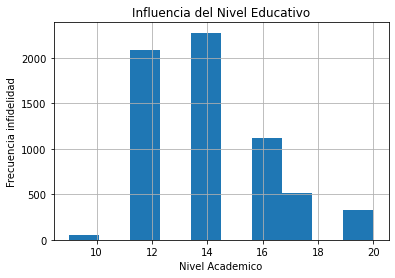

In [7]:
#Para que muestre los graficos en el notebook añadimos:
#%matplotlib inline

# histograma sobre influencia del nivel educativo
dta.educ.hist()
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel Academico')
plt.ylabel('Frecuencia infidelidad')

También podemos observar la influencia de los años de matrimonio:

Text(0, 0.5, 'Frecuencia infidelidad')

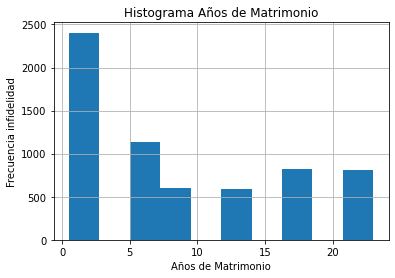

In [9]:


# histograma sobre influencia de los años de matrimonio
dta.yrs_married.hist()
plt.title('Histograma Años de Matrimonio')
plt.xlabel('Años de Matrimonio')
plt.ylabel('Frecuencia infidelidad')

In [10]:
#Creamos una nueva variable binaria "infidelidad" para tratarlo como un problema de clasificación 0=fiel, 1=infiel
#Mostramos los primeros....infieles
dta['infidelidad']=(dta.affairs>0).astype(int)
print(dta.head(10))
dta.shape

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  infidelidad  
0              5.0  0.111111            1  
1              4.0  3.230769            1  
2           

(6366, 10)

In [11]:
feature_names = ['rate_marriage', 'age', 'yrs_married', 'children','religious','educ','occupation','occupation_husb']
X = dta[feature_names]
y = dta['infidelidad']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
  random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[1.        , 0.3877551 , 0.24444444, ..., 0.63636364, 0.2       ,
        1.        ],
       [0.75      , 1.        , 1.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       [1.        , 0.79591837, 1.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       ...,
       [0.5       , 0.18367347, 0.08888889, ..., 0.45454545, 0.4       ,
        0.6       ],
       [1.        , 0.18367347, 0.        , ..., 0.45454545, 0.4       ,
        0.8       ],
       [0.75      , 0.18367347, 0.08888889, ..., 0.27272727, 0.4       ,
        0.2       ]])

In [15]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.95
Accuracy of Decision Tree classifier on test set: 0.66


In [16]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
lr = regressor.fit(X_train, y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [14]:
lr.score(X_train,y_train)

0.15955031432335953

In [15]:
#Realizamos la predicción con test
print(lr.predict(X_test))

[0.58726202 0.00382948 0.34026419 ... 0.46727903 0.20987881 0.25617711]
